<a href="https://colab.research.google.com/github/kszymon/data-science-bootcamp/blob/main/06_uczenie_maszynowe/09_svm_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Support Vector Machine
### scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```
### Spis treści:
1. [Import bibliotek](#1)
2. [Wczytanie danych](#2)
3. [Wyświetlenie kilku obrazów](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Trenowanie modelu](#5)
6. [Ocena modelu](#6)
7. [Wyświetlenie błędnych predykcji](#7)

### <a name='1'></a> Import bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

### <a name='2'></a> Wczytanie danych

In [3]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
images = digits.images
labels = digits.target
print('image shape:', images.shape)
print('labels shape:', labels.shape)

image shape: (1797, 8, 8)
labels shape: (1797,)


In [7]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### <a name='3'></a> Wyświetlenie kilku obrazów

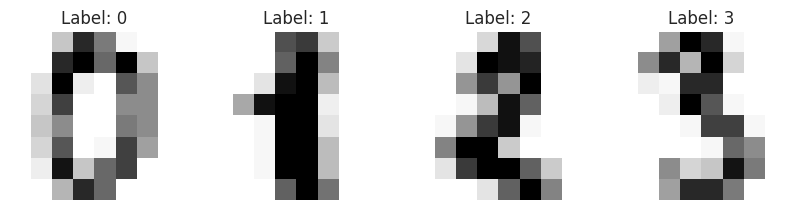

In [10]:
plt.figure(figsize=(10,10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

### <a name='4'></a> Przygotowanie danych do modelu

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0],-1)

print()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [15]:
X_train[0]

array([ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4.,
        0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6.,
       13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12., 16., 13.,  3.,
        0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8.,
        2.,  4., 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.])

In [13]:
y_train[0]

6

### <a name='5'></a> Trenowanie modelu

In [16]:
from sklearn.svm import SVC

classifier = SVC(gamma = 0.001)
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

### <a name='6'></a> Ocena modelu

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 4, 9, 6, 2, 1, 3, 1, 8, 3, 8, 4, 5, 0, 9, 6, 1, 5, 3, 0, 5, 5,
       1, 0, 7, 7, 7, 9, 8, 3, 2, 8, 9, 7, 4, 1, 2, 3, 2, 1, 8, 8, 2, 7,
       5, 9, 8, 8, 7, 3, 3, 2, 4, 9, 0, 8, 2, 2, 8, 0, 1, 6, 5, 9, 0, 4,
       2, 9, 6, 8, 7, 6, 4, 8, 6, 8, 3, 9, 8, 5, 3, 9, 7, 4, 8, 6, 5, 3,
       2, 9, 6, 3, 3, 0, 6, 1, 7, 8, 0, 4, 3, 0, 0, 1, 5, 5, 3, 6, 2, 1,
       5, 5, 4, 2, 5, 1, 1, 1, 5, 2, 7, 2, 4, 9, 1, 0, 1, 0, 1, 0, 5, 1,
       8, 5, 9, 5, 8, 0, 3, 7, 2, 9, 6, 5, 3, 0, 8, 7, 1, 9, 3, 9, 3, 6,
       8, 8, 3, 2, 3, 3, 3, 4, 1, 3, 1, 6, 0, 8, 7, 3, 7, 3, 2, 1, 1, 7,
       8, 1, 4, 1, 8, 7, 7, 4, 7, 6, 4, 5, 0, 2, 7, 7, 9, 2, 6, 9, 1, 3,
       3, 5, 4, 4, 0, 2, 8, 2, 3, 5, 1, 6, 9, 7, 3, 1, 7, 2, 9, 7, 2, 9,
       6, 1, 3, 1, 5, 1, 8, 2, 7, 7, 1, 3, 7, 5, 1, 0, 6, 0, 4, 4, 1, 8,
       6, 4, 7, 0, 1, 0, 4, 3, 0, 4, 7, 3, 9, 6, 0, 8, 9, 1, 9, 0, 0, 7,
       8, 9, 4, 1, 1, 0, 0, 0, 4, 5, 3, 0, 0, 0, 0, 6, 5, 9, 8, 2, 0, 9,
       1, 1, 4, 9, 7, 0, 5, 6, 5, 8, 9, 1, 3, 4, 0,

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        43
           5       0.98      0.98      0.98        42
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00        46
           9       0.97      0.97      0.97        40

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 39]])

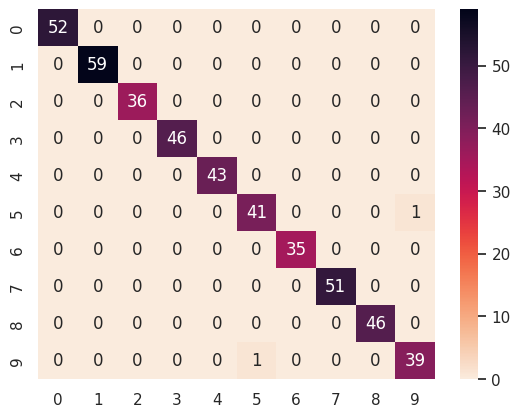

In [20]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [24]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### <a name='7'></a> Wyświetlenie błędnych predykcji

In [25]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test' : y_test})
results.head(10)

,y_pred,y_test
0,3,3
1,4,4
2,9,9
3,6,6
4,2,2
5,1,1
6,3,3
7,1,1
8,8,8
9,3,3


In [27]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[53, 378]

In [28]:
results.loc[errors_idxs, :]

,y_pred,y_test
53,9,5
378,5,9


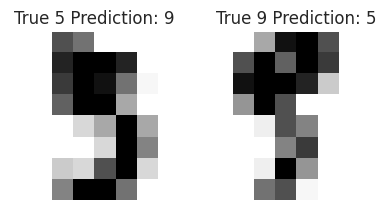

In [30]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")
